<a href="https://colab.research.google.com/github/zackives/upenn-cis-2450/blob/main/16_Module_3_Notebook_IV_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning and Linear/Logistic Regression

Let's consider **supervised** machine learning, which learns a function from input features to output classes.

## Autograder setup

In [85]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 99999999 # YOUR PENN-ID GOES HERE AS AN INTEGER##PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO

In [86]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [87]:
%set_env HW_ID=cis2450_fall24_HW9

env: HW_ID=cis2450_fall24_HW9


In [88]:
!pip3 install penngrader-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.3 MB/s eta 0:00:00


In [89]:
import os
from penngrader.grader import *

grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 99999999

Make sure this correct or we will not be able to store your grade


## Simple Linear Regression

Let's start with a really simple problem, which is fitting a line (linear function) to a set of points.

Here are the points...

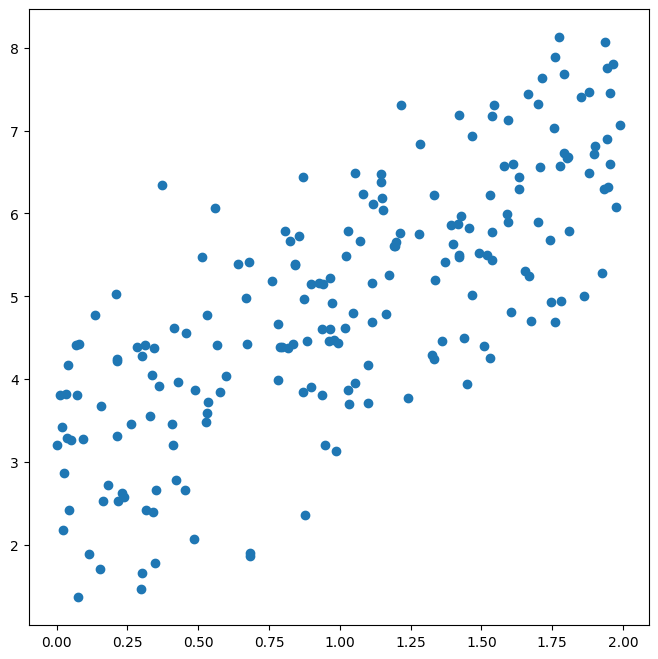

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Let's plot a series of points
X = 2 * np.random.rand(200, 1)

# We are plotting y = 2x + 3 plus a random
# value
y = 2 * X + 3 + np.random.randn(200, 1)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)


Here's a simple machine learning model -- Linear Regression -- that finds the slope + intercept (sometimes called the weight + bias) for the best-fit line.

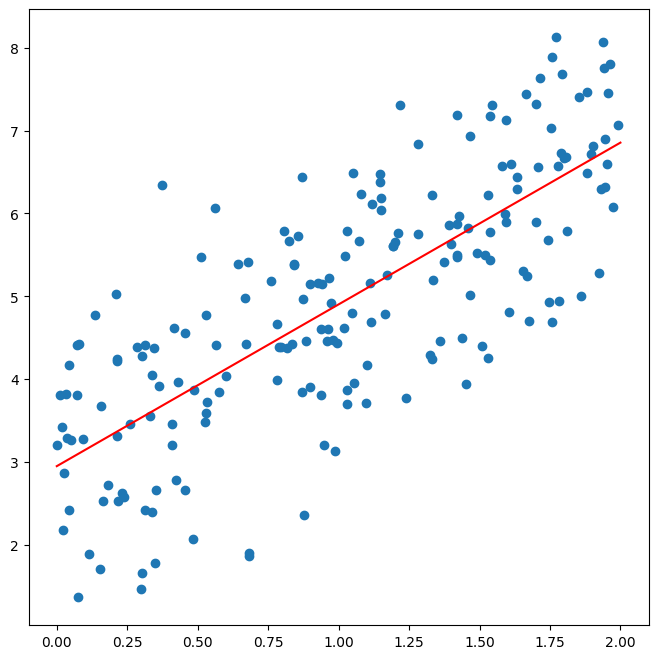

Intercept: [2.95090842]
Coefficient: [[1.95196154]]


In [91]:
from sklearn.linear_model import LinearRegression

# Use regression to get slope + intercept for
# a line matching the points
rgr = LinearRegression()
rgr.fit(X, y)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)

# The line will be from 0 -> 3 non-inclusive
X2 = range(0,3)
y2 = rgr.coef_*X2 + rgr.intercept_
ax.plot(X2, y2.T, color='red')
plt.show()

print ("Intercept:", rgr.intercept_)
print ("Coefficient:",rgr.coef_)

How can we actually do this ourselves?

We can use the "normal equation" $(X^T X)^{-1} X^T y$ to compute this using a closed form solution.  It's a bit expensive, and it does require that we add the intercept $x_0=1$ to the $X$ matrix...

Intercept:  [2.95090842]
Coefficient:  [1.95196154]


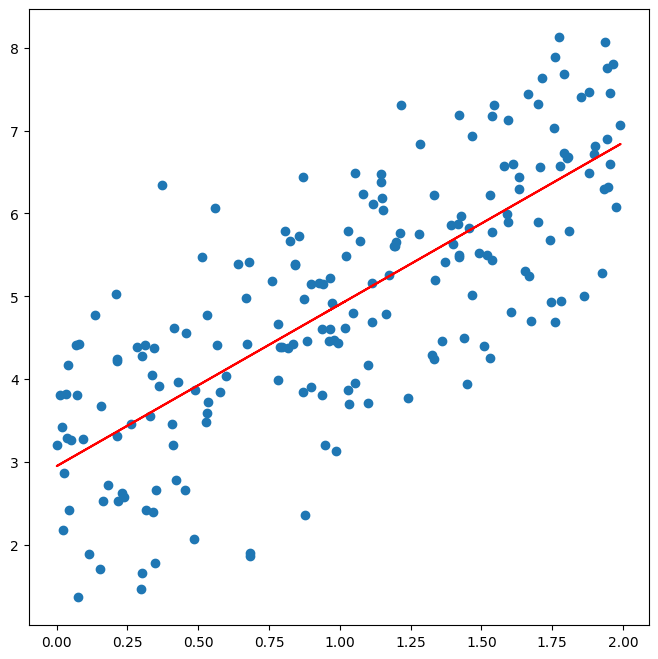

In [92]:
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Insert the x_0 column
X_with_bias = np.ones((X.shape[0],2))
X_with_bias[:,1] = X.T

b = inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)
print('Intercept: ', b[0])
print('Coefficient: ', b[1])

# predict using coefficients
yhat = X_with_bias.dot(b)
# plot data and predictions
# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)

plt.plot(X, yhat, color='red')
plt.show()


## Linear Regression for Real Data


In [93]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

housing_df = pd.DataFrame(data, columns=feature_names)
housing_df['Price'] = target
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [94]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

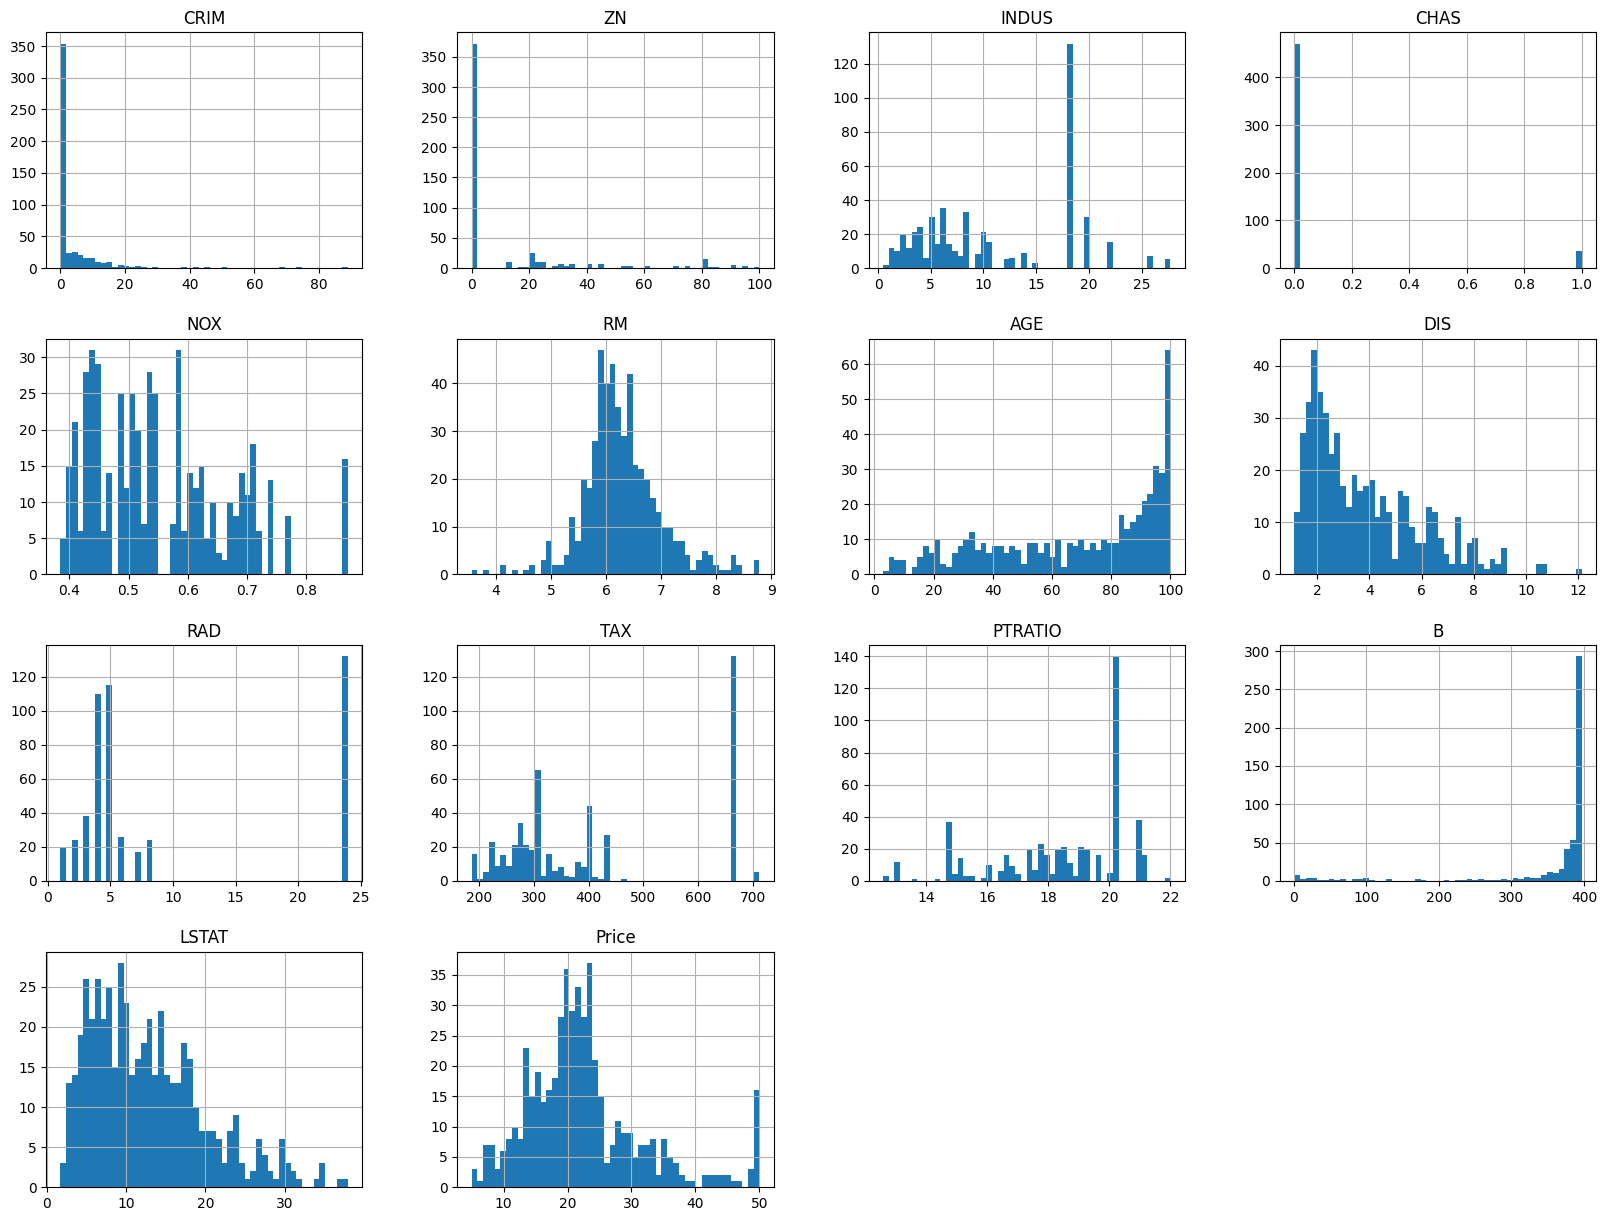

In [95]:
housing_df.hist(bins=50, figsize=(20,15))

In [96]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [97]:
y = target
X = data

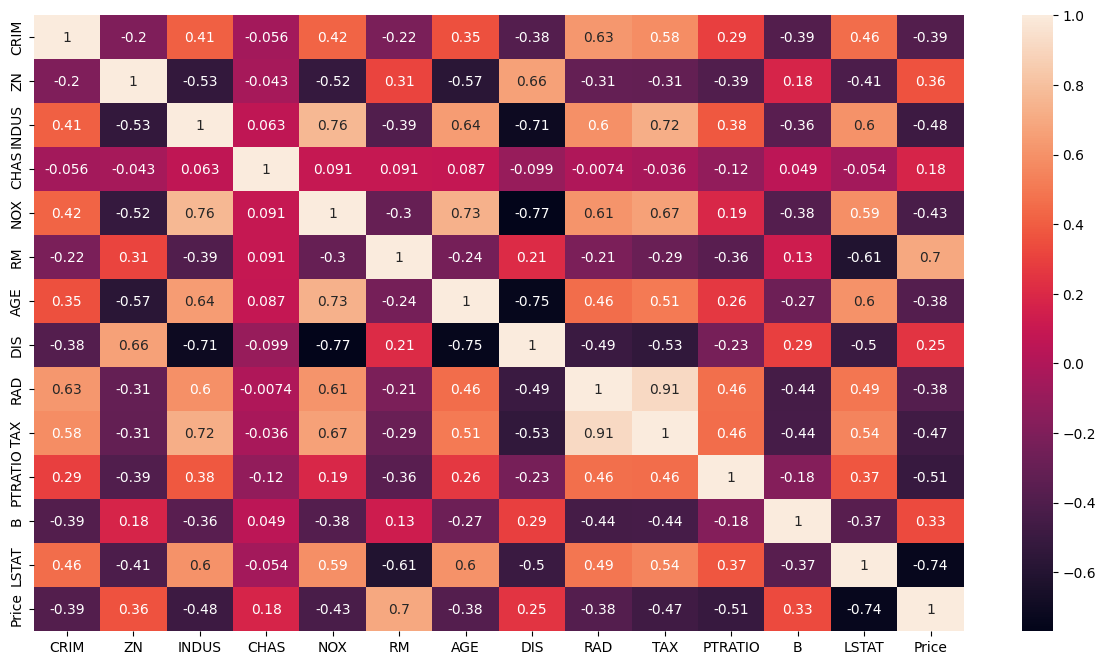

In [98]:
# Is the data correlated?
corr_matrix = housing_df.corr()

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sn.heatmap(corr_matrix, annot=True)
plt.show()

Let's build a model!

First, maybe we should scale, decompose, etc.

Given the above correlation matrix, note there are high correlations between some of the fields. Maybe it's a good idea to use PCA to create new components.

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create our training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Normally we should scale and run PCA *only on the training data*, pretending
# we can't see the test data
scaler = StandardScaler()
X2_train = scaler.fit_transform(X_train)

# But we obviously need to transform as well
X2_test = scaler.transform(X_test)

pca = PCA(n_components=13)
X3_train = pca.fit_transform(X2_train)
X3_test = pca.transform(X2_test)

How much do the components contribute?

In [100]:
pca.explained_variance_ratio_

array([0.44940747, 0.11614882, 0.10259284, 0.07056791, 0.06018428,
       0.05026998, 0.04378072, 0.03276073, 0.02289195, 0.01775034,
       0.01520702, 0.0129517 , 0.00548625])

Note that the last 2-3 components aren't super useful. We could easily reduce dimensionality to, say, 11 dimensions. But for now we'll keep things lossless.

Score: 0.6846196251810697
MAE: 3.430244547476855
MSE: 24.018155856141274
RMSE: 4.900832159556301


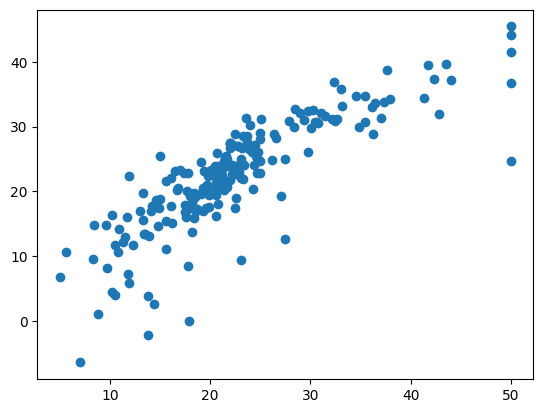

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))
plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))


32.865389444290585
[-1.13002053e-01  2.63040650e-02  5.49119653e-02  3.62262040e+00
 -1.81781926e+01  4.43488729e+00 -1.23346265e-03 -1.31491572e+00
  2.49545836e-01 -9.74486492e-03 -9.59415283e-01  7.58022783e-03
 -5.68841698e-01]


<BarContainer object of 13 artists>

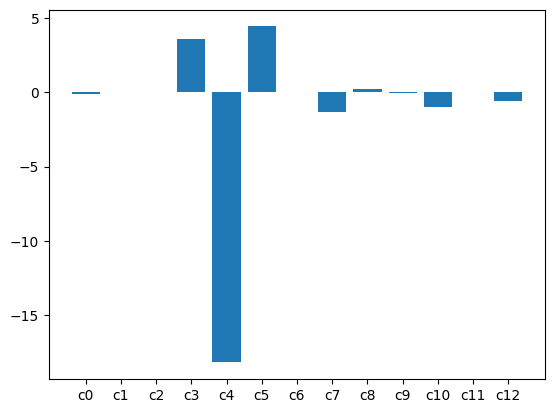

In [102]:
print(clf.intercept_)
print(clf.coef_)
plt.figure(dpi=100)
#plt.bar(housing_data.feature_names,clf.coef_)
plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12'], clf.coef_)

## Regularization

As a first step, we can use *lasso* or L1 regularization, which produces *sparse weights*.

Score: 0.653359579176378
MAE: 3.7626664089132595
MSE: 26.398800680480427
RMSE: 5.137976321518077
[-0.07214053  0.02826265 -0.          0.         -0.          1.40806417
  0.02247105 -0.55932947  0.22762126 -0.01288574 -0.62987113  0.00667031
 -0.82971939]


<BarContainer object of 13 artists>

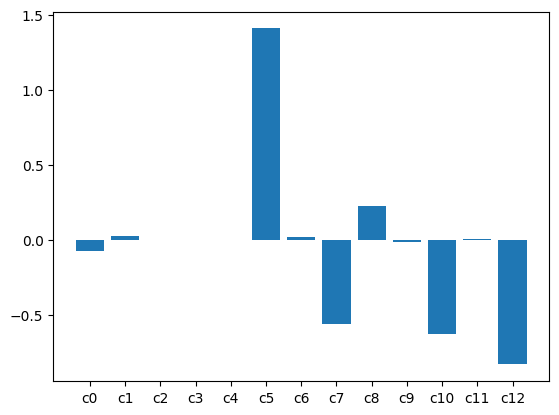

In [103]:
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
#plt.bar(feature_names,clf.coef_)
plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12'], clf.coef_)

What about L2 (ridge)?

Score: 0.6819971783848905
MAE: 3.3966962245422403
MSE: 24.217871313741423
RMSE: 4.921165645834472
[-1.07387598e-01  2.79631784e-02  1.80042780e-02  3.40076684e+00
 -8.87709989e+00  4.52273809e+00 -9.20165140e-03 -1.17306866e+00
  2.22884653e-01 -1.04771610e-02 -8.29095353e-01  8.01815327e-03
 -5.82720370e-01]


<BarContainer object of 13 artists>

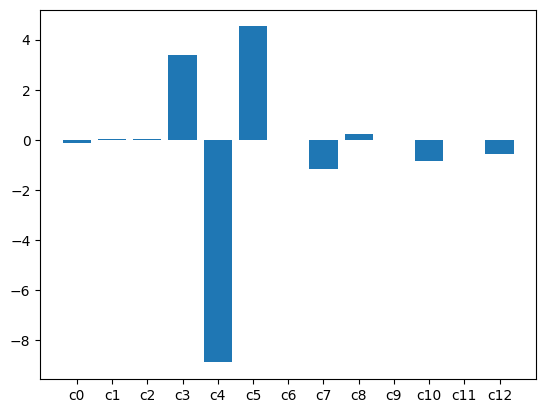

In [104]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
# plt.bar(feature_names,clf.coef_)
plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12'], clf.coef_)

And finally, what if we put the two together, in the form of Elastic Net?

Score: 0.6556231065500329
MAE: 3.7428558671325853
MSE: 26.22641914508433
RMSE: 5.121173610129257
[-0.08692021  0.03550657 -0.          0.         -0.          1.08612806
  0.02178088 -0.68229335  0.27399755 -0.01476842 -0.67132971  0.00670609
 -0.84497612]


<BarContainer object of 13 artists>

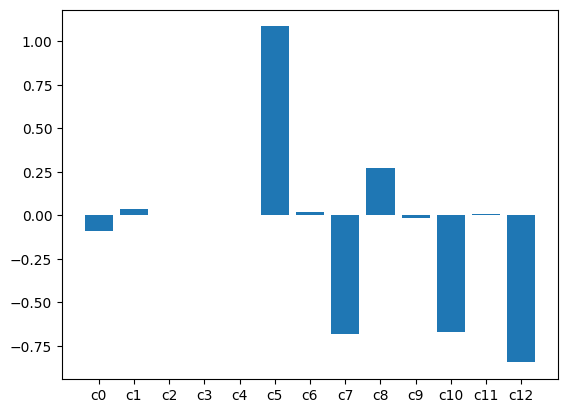

In [105]:
from sklearn.linear_model import ElasticNet


clf = ElasticNet()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

print(clf.coef_)
plt.figure(dpi=100)
# plt.bar(feature_names,clf.coef_)
plt.bar(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12'], clf.coef_)

## Logistic Regression

Logistic regression uses techniques from linear regression but tries to map to Boolean values.

### The Logistic Function

Let's look at the **logit** or **logistic** function, also called the **sigmoid** function and indicated by $\sigma$, which is "near linear" but flattens at 0 and 1.  Let's look at several variations, also vs a linear and step function...

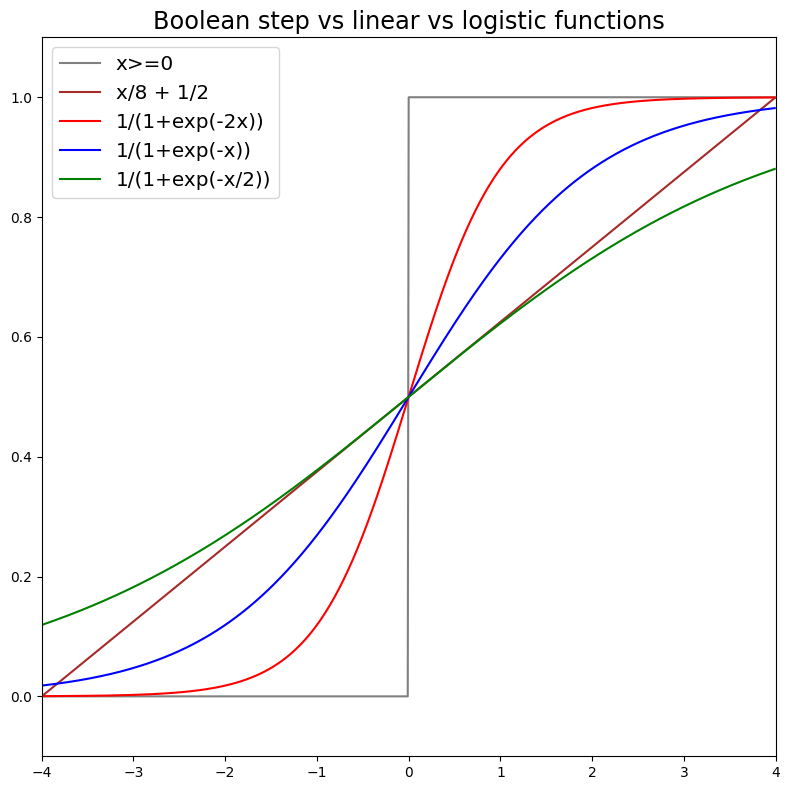

In [106]:
X = [x * 0.01 for x in range(-400,400)]

def logit_1(x):
  return 1 / (1 + np.exp(-2*x))

def logit_2(x):
  return 1 / (1 + np.exp(-x))

def logit_3(x):
  return 1 / (1 + np.exp(-(x * 0.5)))


# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X, [1 if x >= 0 else 0 for x in X], color='gray', label='x>=0')
ax.plot(X, [x/8+0.5 for x in X], color='brown', label='x/8 + 1/2')
ax.plot(X, [logit_1(x) for x in X], color='red', label='1/(1+exp(-2x))')
ax.plot(X, [logit_2(x) for x in X], color='blue', label='1/(1+exp(-x))')
ax.plot(X, [logit_3(x) for x in X], color='green', label='1/(1+exp(-x/2))')
ax.set_title('Boolean step vs linear vs logistic functions',fontsize='xx-large')
ax.set_xlim(-4, 4)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize='x-large')
plt.tight_layout()

plt.show()


### Using Logistic Regression in SciKit-Learn

We can easily use a logistic regression classifier from SciKit to train and make predictions.

For simplicity, we'll start without scaling the data.

In [107]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine

dataset = load_wine()
dataset.feature_names

from sklearn.model_selection import train_test_split
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split(dataset.data, \
                                                    dataset.target, \
                                                    test_size=0.40)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 94.4%


Of course, we should scale the data first. We can create multi-stage *pipelines*...

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scl = StandardScaler()

pca = PCA()

clf = LogisticRegression(max_iter=10000, penalty='l2')

pipe = Pipeline(steps=[('Scale',scl),('PCA',pca),('LogReg',clf)])

pipe.fit(X_train,y_train)

prediction = pipe.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 94.4%


## Gradient Descent

Gradient descent consists of taking *steps* towards our optimal values (for weights).

For linear regression without regularization, there is a direct closed-form solution. For linear regression with regularization, or for logistic regression, we need to use gradient descent.

### Gradient Descent with a Linear Function

To look at gradient descent, let's first consider a simple example based on our wine dataset, with a linear value for our prediction.  (We'll relax this in a moment to consider the logistic function.)

We can define the cost function to be Mean Squared Error as follows:

$MSE = {1 \over n}\Sigma^n_{i=1}(\hat{y}^{(i)} - y^{(i)})$

where

$\hat{y}^{(i)} = \sigma(w^T \cdot x^{(i)})$.

(Recall $\sigma$ is the sigmoid function.)

For linear regression let's set up a simple line-fit:


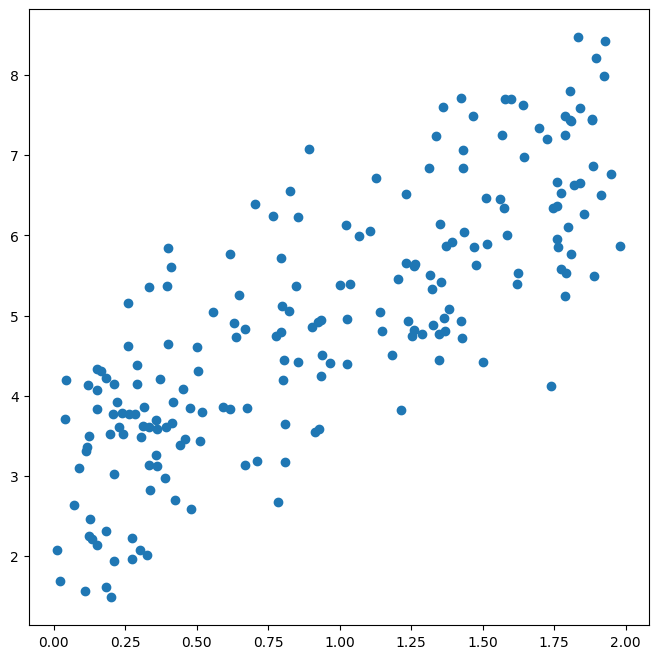

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Let's plot a series of points
X = 2 * np.random.rand(200, 1)

# We are plotting y = 2x + 3 plus a random
# value
y = 2 * X + 3 + np.random.randn(200, 1)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)


Test and training sets...

In [110]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

# Change X-vector to include an additional feature with value 1,
# for the bias/intercept term

X2 = np.ones((X.shape[0],2))
X2[:,1] = X.T

X_train, X_test, y_train, y_test = train_test_split(X2, \
                                                    y, \
                                                    test_size=0.30)


Let's drill down to one of the features (dimensions) and see how the cost (weight) relates to the (squared) error of the overall cost function.

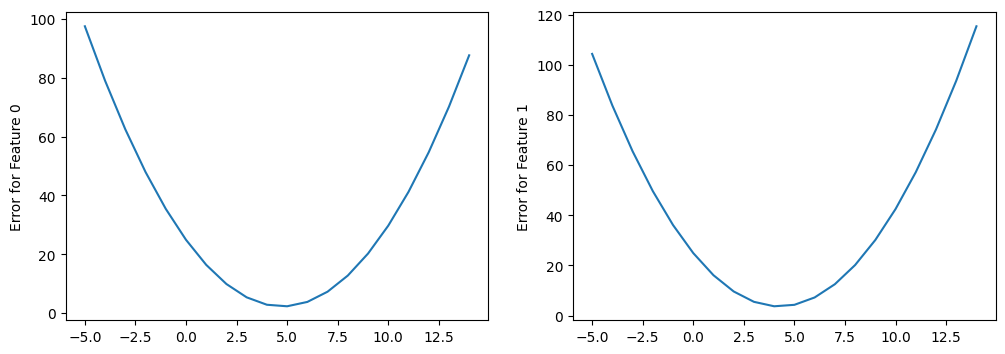

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


x_coord = range(-5,15)

plt.figure(figsize=(12, 4))

w = np.random.randn(2)

# Here's our cost function, as mean squared error
def cost_fn(X, y, p, fn):
  if len(X.shape) == 1:
    # Single row, return the squared error
    return np.square(y - fn(X[p]))
  else:
    # Matrix, return the mean of the squared errors
    return np.average([cost_fn(X[i], y[i], p, fn) for i in range (0, X.shape[0])])

# Now let's plot the error function for a *single instance*, for each feature,
# for a range of weights and the *linear* function x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(X_train, y_train, feature, lambda x: x*w) for w in x_coord])
  ax.set_ylabel('Error for Feature ' + str(feature))


Since we have squared error, this should of course be a parabola!

The bottom of the parabola is the optimal weight for this particular dimension, and is what we are searching for.

Now imagine we are doing this simultaneously in all dimensions.

### Gradient Descent Function

The function takes a *step* eta, the weights $w$, and $X$ and $y$. We look at the overall error and step along each dimension.

[[2.6262959 ]
 [2.30292399]]
[12.976559957946321, 12.159683482742112, 11.405534031088646, 10.709226242501868, 10.066255762248053, 9.472469523096361, 8.92403834510799, 8.417431672653787, 7.949394281955378, 7.516924805447871, 7.117255931251143, 6.747836147090282, 6.406312908197343, 6.090517118123137, 5.798448820051321, 5.528264004195017, 5.278262444220898, 5.046876482436065, 4.83266068973371, 4.634282332065941, 4.450512580534186, 4.280218407094659, 4.122355112400546, 3.975959436473887, 3.840143206746189, 3.7140874815526947, 3.597037150434684, 3.488295955618549, 3.387221901819641, 3.2932230240813687, 3.205753485722605, 3.124309980644808, 3.048428416258648, 2.977680855141674, 2.911672695245878, 2.8500400700481667, 2.7924474514880666, 2.7385854398751888, 2.6881687261827074, 2.640934213280685, 2.596639283711848, 2.555060202579456, 2.5159906450084506, 2.4792403384631263, 2.444633810962466, 2.4120092369330792, 2.3812173730839756, 2.352120577281443, 2.3245919039499836, 2.298514270030258, 2.2737

Text(0, 0.5, 'Mean-squared error (loss)')

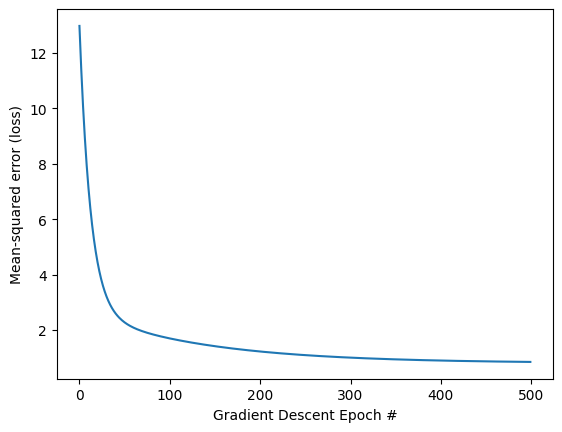

In [112]:
def gradient_descent(epochs, eta, X, w, y):
  """
  The gradient descent iterates for *epochs* rounds, making a step
  of size eta.  It will be adjusting w, based on the prediction for each
  instance vs y and the overall error.
  """
  # We'll use this list to accumulate
  # the error
  overall_error = []
  # Iterate over each epoch
  for i in range(epochs):
    # This is y-hat, the predictions for each
    # class label before they are thresholded
    # based on comparison with 0.5
    predictions = X.dot(w)

    # The overall error, as a vector
    error = (predictions - y)

    # Record the MSE so we can plot it
    mean_sq_error = np.sum(error ** 2) / X.shape[0]
    overall_error.append(mean_sq_error)

    # Now we update the weights.
    # The gradient is based on the partial derivative
    # of the MSE with respect to w.
    gradient = 2 / X.shape[0] * X.T.dot(error)

    w = w - eta * gradient

  return w, overall_error

# Training rounds or epochs
epochs = 500
eta = 0.01

w = np.zeros((2,1))
w[:,0] = np.random.randn(2)

weights, evect = gradient_descent(epochs, eta, X_train, w, y_train)
print (weights)
print (evect)

# Plot the mean-squared error
plt.plot(range(0,epochs), evect)
plt.xlabel('Gradient Descent Epoch #')
plt.ylabel('Mean-squared error (loss)')

## Gradient Descent for Training Logistic Regression

Let's try this with logistic regression, using the sigmoid function...

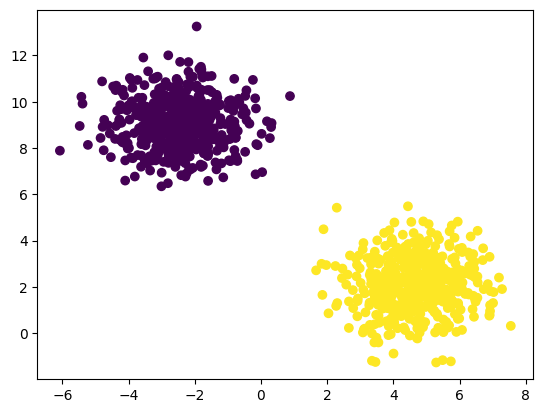

In [113]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, \
                    cluster_std=1.10, random_state=42)

import matplotlib.pyplot as plt


plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=0.30)


First' let's look at the shape of the cost functions for $y_i=1$, $y_i=0$...  Recall that here we use *log loss*:

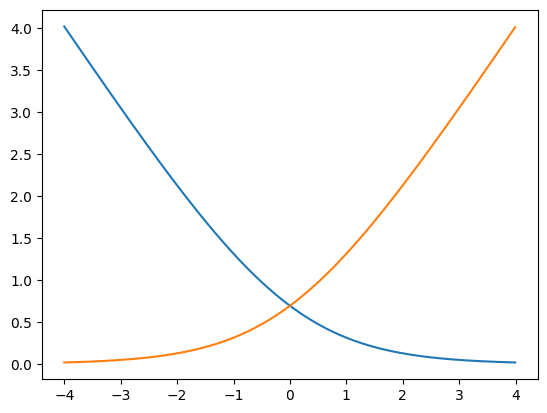

In [114]:
import matplotlib
import matplotlib.pyplot as plt
import math

def prediction(x):
  return 1.0 / (1 + np.exp(-x))

x = [(i - 500)/125 for i in range(1000)]

# Recall the cost function
plt.plot(x,[-math.log(prediction(i)) for i in x])
plt.plot(x,[-math.log(1 - prediction(i)) for i in x])

The derivative of the log loss function, over the sigmoid applied to the dot product of weights and instance, is almost identical to the derivative of the SSE function with linear regression.

[ 0.38613331 -0.18940548]
[0.9823752159718891, 0.9733533586221276, 0.9644750081187636, 0.9557378451173102, 0.9471395435690174, 0.9386777742699007, 0.9303502082352753, 0.9221545198973554, 0.9140883901246216, 0.9061495090627225, 0.8983355787976617, 0.8906443158429128, 0.8830734534529008, 0.8756207437660164, 0.8682839597809541, 0.8610608971707197, 0.8539493759391232, 0.8469472419249711, 0.8400523681594966, 0.8332626560828293, 0.8265760366254993, 0.8199904711611187, 0.8135039523364668, 0.8071145047852506, 0.8008201857318118, 0.7946190854910123, 0.7885093278704566, 0.7824890704811113, 0.7765565049622533, 0.7707098571265256, 0.7649473870307223, 0.7592673889777293, 0.7536681914548662, 0.7481481570136604, 0.7427056820958837, 0.7373391968104559, 0.7320471646656157, 0.7268280822605266, 0.7216804789402799, 0.7166029164180304, 0.7115939883677993, 0.7066523199912572, 0.7017765675616079, 0.6969654179474903, 0.692217588119625, 0.6875318246427469, 0.6829069031551905, 0.6783416278383213, 0.673834830877

Text(0, 0.5, 'Log loss')

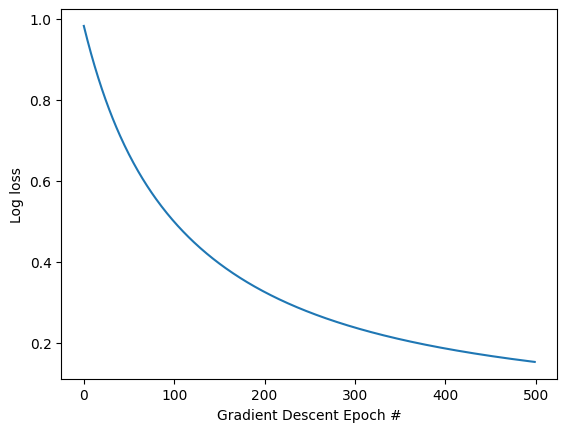

In [115]:
import numpy as np
from sklearn.metrics import log_loss

# Here is our sigmoid function for making
# predictions with logistic regression
# or with perceptron-style neural nets
def prediction(x):
  return 1.0 / (1 + np.exp(-x))


def gradient_descent(epochs, eta, X, w, y):
  """
  The gradient descent iterates for *epochs* rounds, making a step
  of size eta.  It will be adjusting w, based on the prediction for each
  instance vs y and the overall error.
  """
  # We'll use this list to accumulate
  # the error
  overall_error = []
  # Iterate over each epoch
  for i in range(epochs):
    # This is y-hat, the predictions for each
    # class label before they are thresholded
    # based on comparison with 0.5
    predictions = prediction(X.dot(w))

    # The overall error, as a vector
    error = (predictions - y)

    # Record the log loss so we can plot it
    mean_sq_error = log_loss(y, predictions)
    overall_error.append(mean_sq_error)

    # Now we update the weights.
    # The gradient is based on the partial derivative
    # of the log loss with respect to w.
    gradient = 1 / X.shape[0] * X.T.dot(error)

    w = w - eta * gradient

  return w, overall_error

# Training rounds or epochs
epochs = 500
eta = 0.001

w = np.random.randn(2)

weights, evect = gradient_descent(epochs, eta, X, w, y)
print (weights)
print (evect)

# Plot the mean-squared error
plt.plot(range(0,epochs), evect)
plt.xlabel('Gradient Descent Epoch #')
plt.ylabel('Log loss')

How close do we get to optimal? Let's plot where we set the weight, versus the minimum. Given the size of eta we won't necessarily get to the exact minimum.

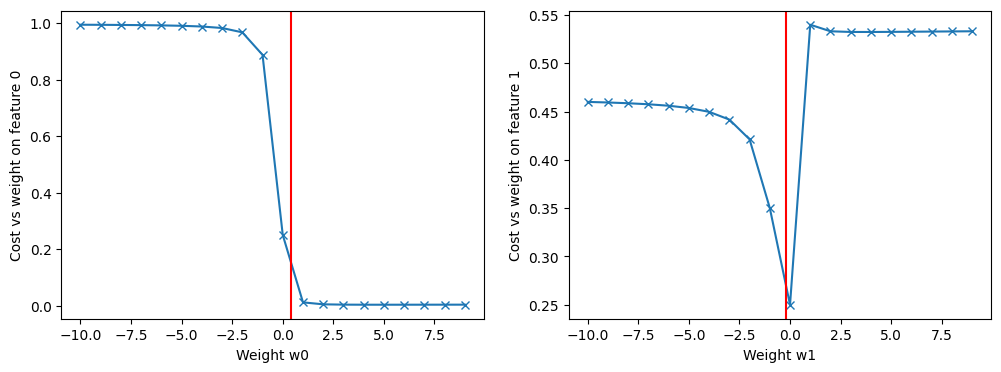

In [116]:
x_coord = range(-10,10)

plt.figure(figsize=(12, 4))

# Now let's plot the error function for each feature,
# for a range of weights and the output of the sigmoid function over x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(X_train, y_train, feature, lambda x: prediction(x*w)) for w in x_coord],
          marker='x')

  ax.axvline(x=weights[feature], color='red')
  ax.set_ylabel('Cost vs weight on feature ' + str(feature))
  ax.set_xlabel('Weight w' + str(feature))

Is it good enough to make predictions?

In [117]:
for item in range(len(X_test)):
  predicted_label = 0 if prediction(X_test[item].dot(weights)) < 0.5 else 1

  print('Prediction {} vs {}'.format(predicted_label, y_test[item]))

Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction

## Exercise

Suppose we are training a Logistic Regression classifier.  Someone tells you your classifier is *overfitting* to the data.  You would want to:

In [118]:
# TODO: pick an answer:
options = ['Increase L1 regularization',
           'Reduce L1 regularization']


my_option = options[# TODO]

In [ ]:
grader.grade('regularization', my_option)